# Banka Pazarlama Veri Analizi

*Bu analiz, vadeli mevduat kampanyasının başarı oranını maksimize etmek için müşteri segmentlerinin ve davranışsal faktörlerin incelenmesi amacıyla hazırlanmıştır.*

In [90]:
import pandas as pd
import numpy as np

In [91]:
df=pd.read_csv("data/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [92]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

| İngilizce İsim | Türkçe Karşılığı | Açıklama                                                                                                                  |
| -------------- | ---------------- | ------------------------------------------------------------------------------------------------------------------------- |
| age            | Yaş              | Müşterinin yaşı.                                                                                                          |
| job            | Meslek           | Müşterinin meslek türü (yönetici, teknisyen, öğrenci vb.).                                                                |
| marital        | Medeni Durum     | Müşterinin medeni durumu (evli, bekâr, boşanmış).                                                                         |
| education      | Eğitim           | Müşterinin eğitim seviyesi (ilkokul, ortaokul, üniversite, bilinmiyor).                                                   |
| default        | Temerrüt         | Müşterinin kredilerinde temerrüde düşüp düşmediği (evet/hayır).                                                           |
| balance        | Bakiye           | Yıllık ortalama hesap bakiyesi (Euro cinsinden).                                                                          |
| housing        | Konut Kredisi    | Müşterinin konut kredisi olup olmadığı (evet/hayır).                                                                      |
| loan           | Kişisel Kredi    | Müşterinin kişisel kredisi olup olmadığı (evet/hayır).                                                                    |
| contact        | İletişim Şekli   | Mevcut kampanya ile son iletişim şekli (telefon, cep telefonu, sabit hat).                                                |
| day            | Gün              | Mevcut kampanya ile son temasın ayın kaçıncı günü olduğu.                                                                 |
| month          | Ay               | Mevcut kampanya ile son temasın ayı (Oca, Şub, Mar vb.).                                                                  |
| duration       | Süre             | Mevcut kampanya ile son temasın süresi (saniye cinsinden). (Not: Pazarlama stratejisi için kullanımından kaçınılmalıdır.) |
| campaign       | Kampanya         | Bu kampanya sırasında müşteriyle kaç kez iletişim kurulduğu (mevcut temas dahil).                                         |
| pdays          | Önceki Günler    | Önceki kampanyadan bu yana geçen gün sayısı. -1 değeri, müşterinin daha önce temas edilmediği anlamına gelir.             |
| previous       | Önceki           | Bu kampanyadan önce müşteriyle kaç kez iletişim kurulduğu.                                                                |
| poutcome       | Önceki Sonuç     | Önceki pazarlama kampanyasının sonucu (başarılı, başarısız, başka bir sonuç, bilinmiyor).                                 |
| deposit        | Mevduat          | Hedef Değişken: Müşterinin vadeli mevduata abone olup olmadığı (evet/hayır).                                              |


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [94]:
#Görselleştirme işlemleri

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


Abonelik Durumu ve Yaş Arasındaki İlişki

Korelasyon: 0.034900927890282714



Text(0, 0.5, 'Yaş')

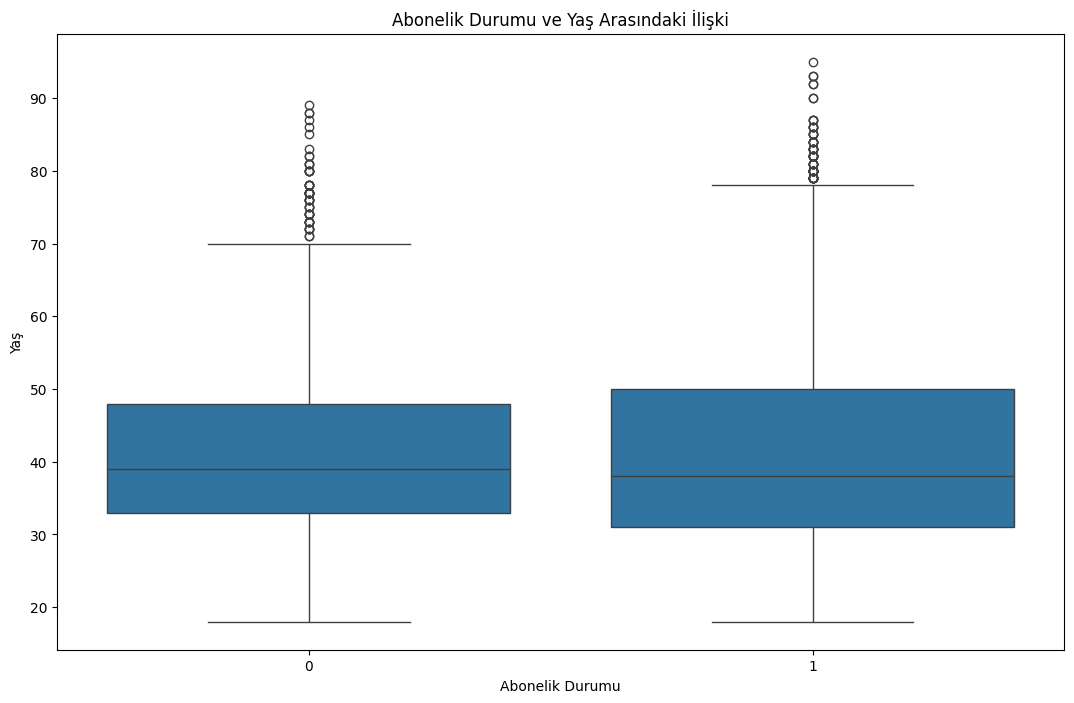

In [ ]:
# Yaş ve Kampanya durumu
print("Abonelik Durumu ve Yaş Arasındaki İlişki\n")
df['deposit']=df['deposit'].replace({'yes':1,'no':0})
corr=df['deposit'].corr(df['age'])
print(f"Korelasyon: {corr}\n")

plt.figure(figsize=(13,8))
sns.boxplot(data=df, x="deposit",y="age")
plt.title("Abonelik Durumu ve Yaş Arasındaki İlişki")
plt.xlabel("Abonelik Durumu")
plt.ylabel("Yaş")

*Grafiğe baktığımda hem abone olan hem de olmayan müşterilerin yaş dağılımları ve medyanlarının oldukça benzer olduğunu görüyorum. Bu, yaşın tek başına vadeli mevduata abone olmayı tahmin etmede çok güçlü bir faktör olmayabileceği anlamına gelir.*

Meslek durumuna göre abone olup olmadığı 

Mesleğe Göre Abonelik Oranları
               Toplam Müşteri  Abone Olan  Dönüşüm Oranı (%)
job                                                         
student                   360         269          74.722222
retired                   778         516          66.323907
unemployed                357         202          56.582633
management               2566        1301          50.701481
unknown                    70          34          48.571429
admin.                   1334         631          47.301349
self-employed             405         187          46.172840
technician               1823         840          46.077894
services                  923         369          39.978332
housemaid                 274         109          39.781022
entrepreneur              328         123          37.500000
blue-collar              1944         708          36.419753


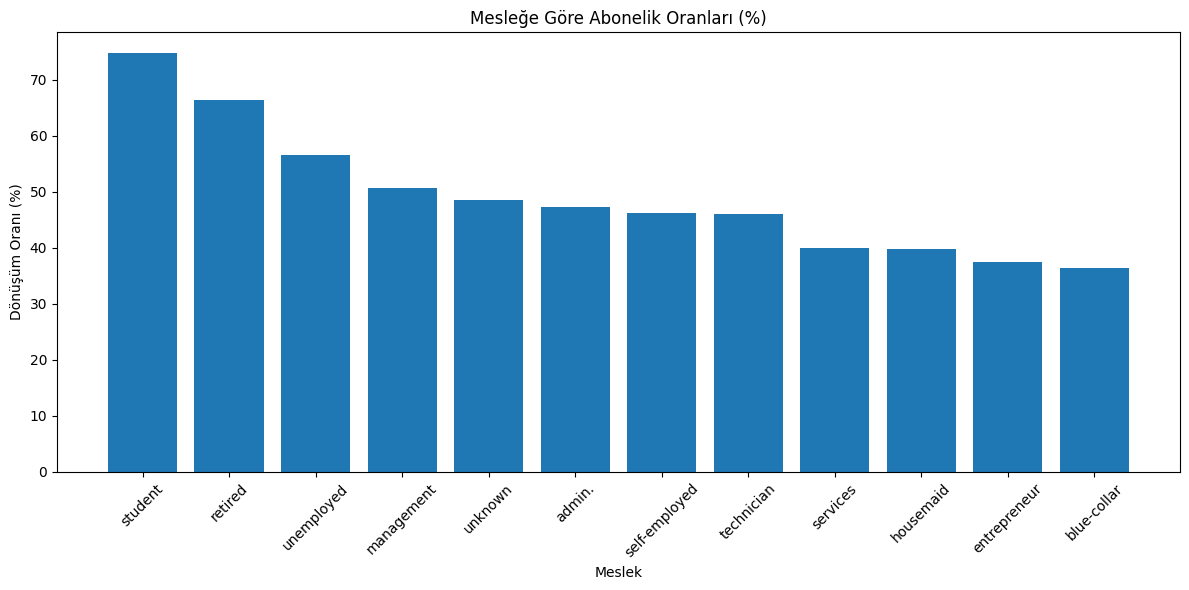

In [ ]:
#Meslek durumuna göre abone olup olmadığı
print("Meslek durumuna göre kampanyaya katılıp katılmadığı \n")

job_counts=df.groupby('job')['deposit'].agg(['count','sum'])
job_counts.columns=["Toplam Müşteri","Abone Olan"]

job_counts['Dönüşüm Oranı (%)'] = (job_counts['Abone Olan'] / job_counts['Toplam Müşteri']) * 100

job_analysis = job_counts.sort_values(by='Dönüşüm Oranı (%)', ascending=False)

print("Mesleğe Göre Abonelik Oranları")
print(job_analysis)


plt.figure(figsize=(12, 6))
plt.bar(job_analysis.index, job_analysis['Dönüşüm Oranı (%)'])
plt.xlabel("Meslek")
plt.ylabel("Dönüşüm Oranı (%)")
plt.title("Mesleğe Göre Abonelik Oranları (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Öğrenci: %74.72 ile açık ara en yüksek dönüşüm oranına sahiptir. Bu, kampanyanın genç ve muhtemelen tasarruf etmeye yeni başlayan bu grup üzerinde son derece etkili olduğunu gösterir.*

*Emekli: %66.32 ile ikinci en yüksek orana sahiptir. Bu, bankanın pazarlama stratejisinde genç ve yaşlı uçlara odaklanmanın başarılı olduğunu kanıtlar.*

*Sonuç: Banka, gelecekteki kampanyalarında öğrenci ve emekli gruplarına öncelik vermeli veya bu gruplara özel, hedefe yönelik teklifler geliştirmelidir. Bu iki grup, genel ortalamanın çok üzerinde bir başarı getirmiştir.*

*Kaynakların büyük bir kısmı, doğal olarak yüksek dönüşüm sağlayan Öğrenci ve Emekli segmentlerine ayrılmalıdır.*

*Mavi Yakalı ve Girişimci grupları için mevcut kampanya mesajları veya iletişim yöntemleri etkili değildir. Bu gruplar için farklı kanallar veya farklı ürünler denenmelidir.*

In [97]:
# Önceki pazarlamanın sonucuna göre analiz
print("Önceki pazarlamanın sonucuna göre analiz")

poutcome_comparison = pd.crosstab(df['poutcome'], df['deposit'], normalize='index') * 100
poutcome_comparison.columns = ['Abone Olmayan (%)', 'Abone Olan (%)']

subscription_rates_table = poutcome_comparison.sort_values(by='Abone Olan (%)', ascending=False)

print("Önceki Kampanya Sonucuna Göre Abone Olma Yüzdeleri")
print(subscription_rates_table)


Önceki pazarlamanın sonucuna göre analiz
Önceki Kampanya Sonucuna Göre Abone Olma Yüzdeleri
          Abone Olmayan (%)  Abone Olan (%)
poutcome                                   
success            8.683473       91.316527
other             42.830540       57.169460
failure           49.674267       50.325733
unknown           59.332212       40.667788


*Önceki bir pazarlama kampanyasında başarılı bir sonuç elde edilen müşterilerin, bu kampanyada vaadeli mevduata abone olma oranı %91 civarında çok yüksek bir değerdedir. Bu müşteriler, bankanın tekliflerine zaten güveniyor veya ihtiyaç duyuyor. Bu grubu hedeflemek, en yüksek yatırım getirisi sağlayacaktır.*

*Önceki kampanyada başarısız olan müşterilerin bile abone olma oranı %50.33'tür. Bu müşterilerin yarısından fazlası, başarısız bir denemeden sonra bile yeni teklifi kabul etmiştir. Bu, bankanın zaman içindeki çabalarının bu kitle için karşılık bulduğunu veya teklifin bu sefer daha cazip olduğunu gösterir. Yani daha cazip tekliflerle önceden kabul olmayan müşterileri yeni kampanyaya dahil edebiliriz.*

In [98]:
# Yılın zamalarına göre abonelik

def analyze_time_variable(df,name,title):
    crosstab_results=pd.crosstab(
        df[name],
        df['deposit'],
        normalize='index'
    ) * 100

    conversion_rate_df=crosstab_results[[1]].rename(columns={1:'Conversion_Rate'})

    if name == 'mounth':
        month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
        conversion_rate_df = conversion_rate_df.reindex(month_order) 
    elif name == 'day':
        conversion_rate_df = conversion_rate_df.sort_index(ascending=True)

    print(f"{title} Dönüşüm Oranları")
    print(conversion_rate_df)

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=conversion_rate_df.index.astype(str), 
        y='Conversion_Rate', 
        data=conversion_rate_df, 
        palette='Spectral'
    )
    plt.title(f'Abonelik Dönüşüm Oranı: {title} Bazında', fontsize=14)
    plt.xlabel(title, fontsize=12)
    plt.ylabel('Abone Olanların Yüzdesi (%)', fontsize=12)
    plt.ylim(0, 100)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Ay Dönüşüm Oranları
deposit  Conversion_Rate
month                   
apr            62.513543
aug            45.292956
dec            90.909091
feb            56.829897
jan            41.279070
jul            41.413474
jun            44.680851
mar            89.855072
may            32.754958
nov            42.735949
oct            82.397959
sep            84.326019


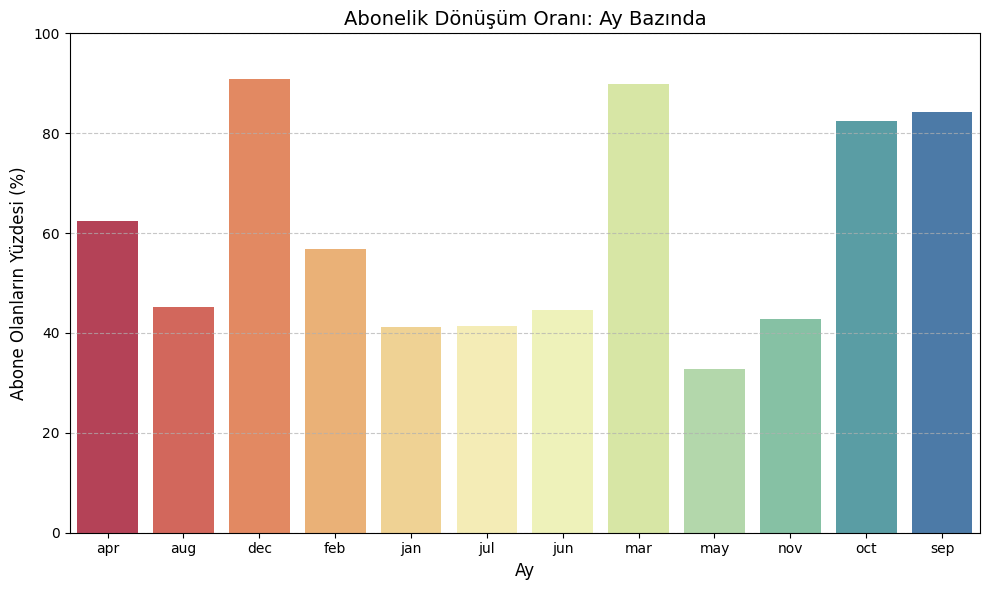

In [99]:
#Aya göre
analyze_time_variable(df, 'month', 'Ay')

Gün Dönüşüm Oranları
deposit  Conversion_Rate
day                     
1              73.770492
2              54.491018
3              58.169935
4              57.213930
5              45.073375
6              40.492170
7              41.099476
8              47.971360
9              49.175824
10             74.233129
11             48.525469
12             54.831461
13             53.200883
14             45.356371
15             51.072961
16             52.032520
17             42.822384
18             41.605839
19             31.770833
20             33.684211
21             44.469027
22             57.249071
23             51.428571
24             50.819672
25             59.375000
26             46.031746
27             52.816901
28             34.878049
29             33.247423
30             56.694561
31             32.857143


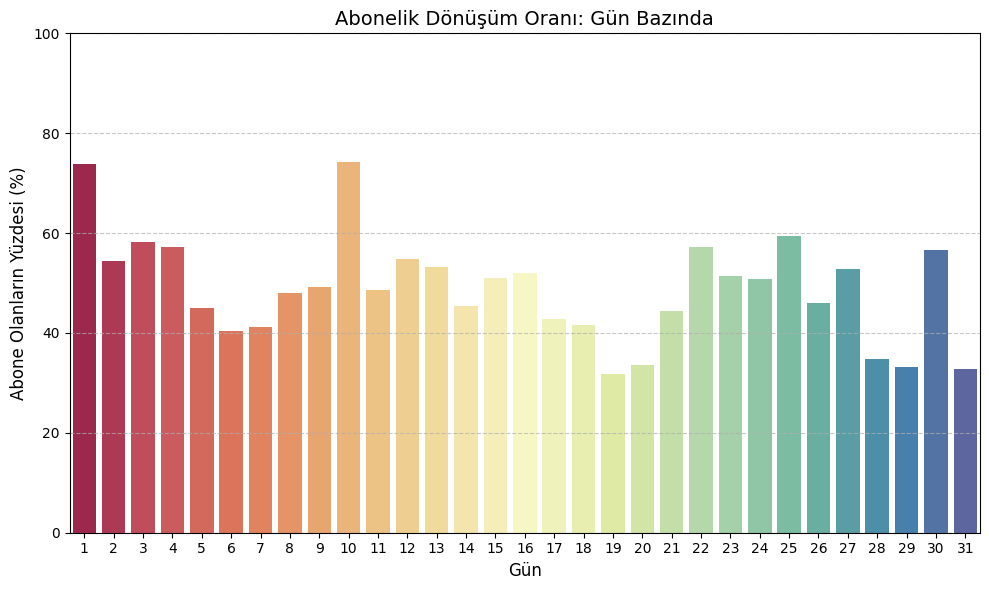

In [100]:
# Gün
analyze_time_variable(df, 'day', 'Gün')

**Yorum**

### Ay
*Lider Aylar: Aralık, Mart, Eylül ve Ekim ayları, %82'nin üzerinde dönüşüm oranlarıyla kampanyanın en verimli olduğu zamanlardır. Bu aylar, muhtemelen müşterilerin yıl sonu bonusları, yeni mali yıl başlangıcı veya tatil dönemi öncesi finansal düzenlemeler yaptığı dönemlerdir.*

*En Kötü Ay: Mayıs ayı, sadece %32.75 dönüşüm oranıyla açık ara en düşük performansı göstermiştir. Banka, Mayıs ayında kampanya yapmaktan kesinlikle kaçınmalıdır.*

*Yaz Etkisi: Yaz ayları ve yılbaşı sonrası ortalamanın altındadır, bu da müşterilerin tatil ve diğer harcamalara odaklandığı dönemlerde tasarruf ürünlerine ilgilerinin azaldığını gösterir.*

### Gün

*Ayın Başlangıcı: Ayın 1. ve 10. günleri sırasıyla %73.77 ve %74.23 gibi çok yüksek dönüşüm oranlarına sahiptir. Bu, maaş veya kira ödemeleri gibi finansal döngülerin hemen ardından müşterilerin bakiyelerini kontrol edip yatırım yapmaya daha istekli olduklarını gösterir.*

*Dönem Sonları: Ayın sonlarına doğru, özellikle 19, 20, 29 ve 31. günler dönüşüm oranının en düşük olduğu zamanlardır. Bu, müşterilerin maaşlarının tükenmeye yaklaştığı, finansal esnekliklerinin en düşük olduğu dönemlerdir.*


### Sonuç

*En İyi Ay: Aralık ve Mart.*

*En İyi Günler: Ayın ilk 10 günü ve özellikle 1. ve 10. günler.*

*Kampanya bütçesinin büyük bir kısmı, Aralık ve Mart aylarının ilk 10 gününe yönlendirilmelidir. Bu zaman diliminde, müşteriler hem finansal olarak rahat hem de psikolojik olarak yatırım yapmaya en istekli durumdadır. Bu, diğer tüm değişkenlerden bağımsız olarak dönüşüm oranını maksimize edecektir.*


Bakiye Özeti
   Abonelik Durumu  Ortalama Bakiye  Müşteri Sayısı
0                0      1280.227141            5873
1                1      1804.267915            5289


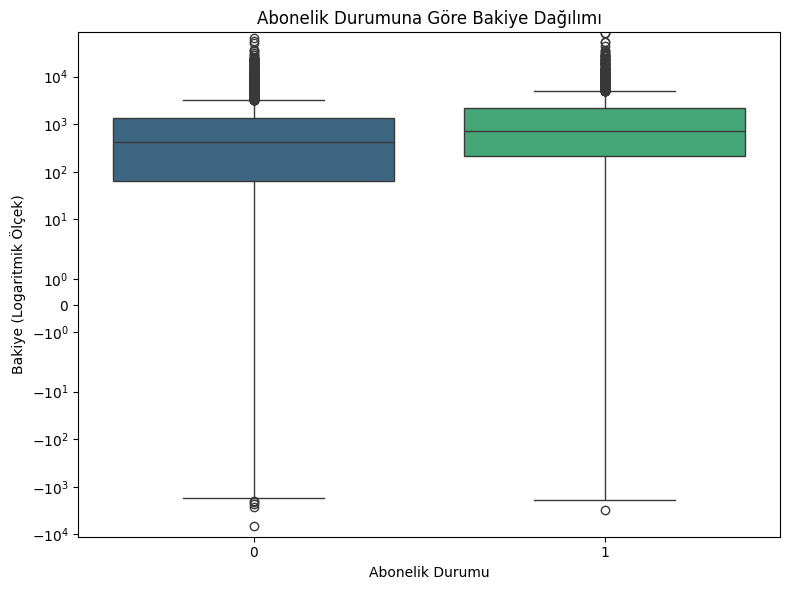

In [101]:
# Abonelik durumuna göre bakiye hesaplanması
balance_summary = df.groupby('deposit')['balance'].agg(['mean', 'count']).reset_index()
balance_summary.columns = ['Abonelik Durumu', 'Ortalama Bakiye','Müşteri Sayısı']

print("Bakiye Özeti")
print(balance_summary)


plt.figure(figsize=(8, 6))


sns.boxplot(x='deposit', y='balance', data=df, palette='viridis')

# 'y' ekseni logaritmik ölçekte ayarladım,
# çünkü bakiye verileri genellikle çok geniş aralıklara ve aykırı değerlere sahiptir.
plt.yscale('symlog') 
plt.title('Abonelik Durumuna Göre Bakiye Dağılımı')
plt.xlabel('Abonelik Durumu')
plt.ylabel('Bakiye (Logaritmik Ölçek)')
plt.tight_layout()
plt.show()

*Medyan değerdeki fark, yüksek bakiyeye sahip müşterilerin vadeli mevduata abone olma eğiliminin daha güçlü olduğunu açıkça göstermektedir. Vadeli mevduatlar genellikle tasarruf amacıyla yapıldığı için, hali hazırda yüksek bakiyesi olan müşterilerin bu ürüne daha yatkın olması beklenen bir durumdur.*

In [102]:
# Temerrüt durumuna göre analiz
print("Temerrüt Durumuna Göre Analiz")

default_comparison = pd.crosstab(
    df['default'],
    df['deposit'],
    normalize='index'
) * 100

conversion_rate = default_comparison[[1]].rename(columns={1: "Abone Olma Oranı (%)"})

sorted_df = conversion_rate.sort_values(by='Abone Olma Oranı (%)', ascending=False)

print("Temerrüt Durumuna Göre Abone Olma Oranı")
print(sorted_df)


Temerrüt Durumuna Göre Analiz
Temerrüt Durumuna Göre Abone Olma Oranı
deposit  Abone Olma Oranı (%)
default                      
no                  47.635074
yes                 30.952381


*Temerrüt, müşterinin finansal disiplininin düşük veya kaynaklarının kısıtlı olduğunun bir göstergesidir. Bu müşteriler, ya tasarruf edebilecekleri yeterli paraya sahip olmadıkları için ya da finansal ürünlere karşı daha temkinli (veya güvensiz) oldukları için vadeli mevduat teklifini daha düşük bir oranda kabul etmektedirler.*

*Bankanın, pazarlama çabalarını büyük ölçüde temerrüde düşmemiş müşterilere yönlendirmesi gerekir. Bu grup, hem ürün alma olasılığı yüksek olan hem de banka için daha az risk teşkil eden kitleyi oluşturur.*

In [103]:
# Kişisel kredi analizi
print("Kişisel Kredi Analizi\n")

loan_comparison = pd.crosstab(
    df['loan'],
    df['deposit'],
    normalize='index'
) * 100

conversion_rate_loan = loan_comparison[[1]].rename(columns={1: 'Abone Olma Oranı (%)'})

sorted_df_loan = conversion_rate_loan.sort_values(by='Abone Olma Oranı (%)', ascending=False)

print("Kişisel Kredi Durumuna Göre Abone Olma Oranı")
print(sorted_df_loan)


Kişisel Kredi Analizi

Kişisel Kredi Durumuna Göre Abone Olma Oranı
deposit  Abone Olma Oranı (%)
loan                         
no                  49.525871
yes                 33.150685


*Kişisel kredisi bulunmayan müşterilerin abone olma oranı yaklaşık %49.53'tür. Bu, genel ortalamaya yakın veya üstü bir başarıyı işaret eder.*

*Kredisi olan müşterilerin, krediyi ödemek için nakit akışlarının daha kısıtlı olması ve bu nedenle vadeli mevduat gibi uzun vadeli tasarruf ürünlerine yatırım yapacak serbest paralarının daha az olması muhtemeldir.*

*Banka, pazarlama çabalarını büyük oranda kişisel kredisi olmayan müşterilere yönlendirmelidir. Bu müşterilerin tasarruf yapma ve yeni finansal ürünlere yatırım yapma olasılığı daha yüksektir.*

In [104]:
#Kampanya tanıtım sırasında müşteri ile kurulan iletişim sayısı

print("Kampanya tanıtım sırasında müşteri ile kurulan iletişim sayısı")
corr=df['deposit'].corr(df['campaign'])
print(f"Korelasyon: {corr}")


Kampanya tanıtım sırasında müşteri ile kurulan iletişim sayısı
Korelasyon: -0.1280808461248676


*Müşteriyi bir ürün için tekrar tekrar aramak, genellikle müşterinin sıkılmasına, rahatsız olmasına ve teklifi reddetme olasılığının artmasına neden olur. İlk aramalarda ikna olmayan bir müşteri, dördüncü veya beşinci aramada da muhtemelen abone olmayacaktır.*

*Banka, kaynaklarını verimli kullanmak için temas sayısını sınırlandırmalıdır. Bir veya iki temas, genellikle dönüşümün gerçekleşmesi için yeterlidir.*

Eğitim durumuna göre abone olup olmadığı 

Eğitime Göre Abonelik Oranları
           Toplam Müşteri  Abone Olan  Dönüşüm Oranı (%)
education                                               
tertiary             3689        1996          54.106804
unknown               497         252          50.704225
secondary            5476        2450          44.740687
primary              1500         591          39.400000


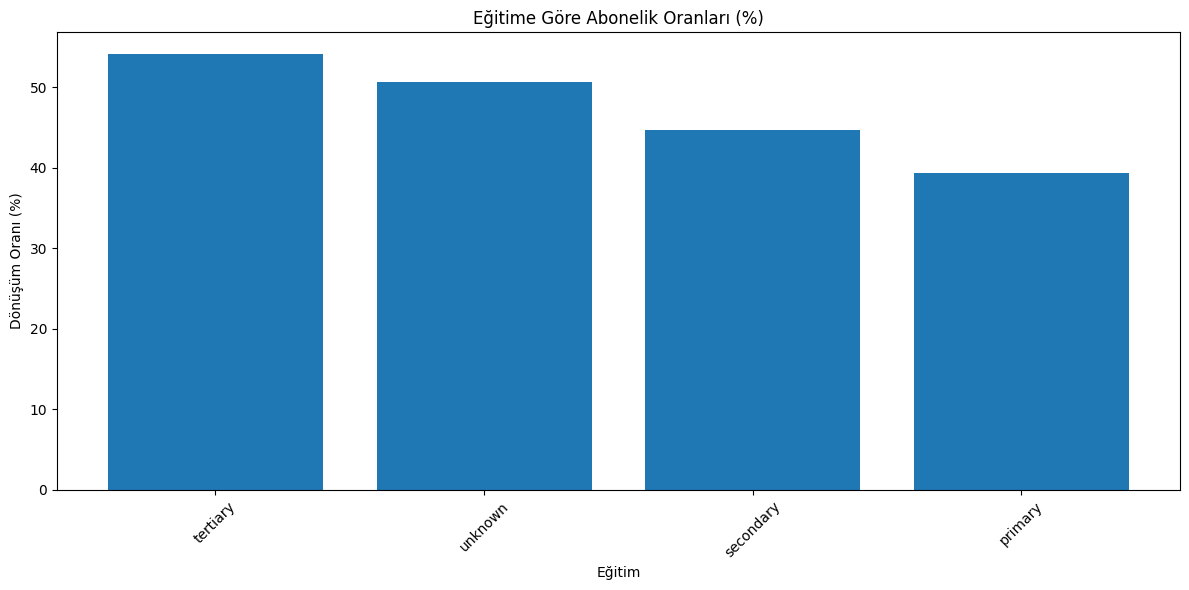

In [105]:
#Eğitim durumuna göre analiz
print("Eğitim durumuna göre abone olup olmadığı \n")

job_counts=df.groupby('education')['deposit'].agg(['count','sum'])
job_counts.columns=["Toplam Müşteri","Abone Olan"]

job_counts['Dönüşüm Oranı (%)'] = (job_counts['Abone Olan'] / job_counts['Toplam Müşteri']) * 100

job_analysis = job_counts.sort_values(by='Dönüşüm Oranı (%)', ascending=False)

print("Eğitime Göre Abonelik Oranları")
print(job_analysis)


plt.figure(figsize=(12, 6))
plt.bar(job_analysis.index, job_analysis['Dönüşüm Oranı (%)'])
plt.xlabel("Eğitim")
plt.ylabel("Dönüşüm Oranı (%)")
plt.title("Eğitime Göre Abonelik Oranları (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Grafik, eğitim seviyesi yükseldikçe vadeli mevduata abone olma oranının da anlamlı derecede yükseldiğini göstermektedir*

*Banka, kaynaklarını öncelikle Yükseköğretim mezunlarına ve Bilinmeyen eğitim seviyesine sahip müşterilere ayırmalıdır.*

# Banka Kampanya Aboneliği Özet Yazısı

**Pazarlama Başarısını Arttıran Değişkenler**

*Abonelik başarısını en güçlü ve pozitif yönde etkileyen faktörler, müşteri ile olan geçmiş etkileşimler, yılın zamanları ve finansal rahatlık durumudur.*

---

**Yılın Zamanları**

*Kampanyaların verimli zamanlanması, dönüşüm oranını önemli ölçüde artırır. Kampanyanın verimli olmasını sağlayan en uygun aylar Aralık (%90.9) ve Mart (%89.86) dır. Bir aya baktığımızda o ayın en verimli günleri ise genelde 1. ve 10. günleri gibi insanların kredi borcunu ödediği kartlarını hafiflettiği olan ay başı günleridir.*


---

**Önceki Kampanya Sonucu**

*En kritik göstergedir. Geçmiş bir kampanyada başarılı olan müşterilerin abone olma oranı %91.32 gibi ezici bir çoğunluktadır. Geçmişte başarısız olan müşterilerin bile abone olma oranı %50.33’tür. Pazarlama kaynaklarının önceliği, geçmişte başarılı olunmuş müşterilere verilmelidir.*


---

**Meslek**

*Öğrenciler (%74.72) ve Emekliler (%66.32), diğer tüm meslek gruplarına göre açık ara en yüksek dönüşüm oranına sahiptir.*

*Genç (öğrenci) ve yaşlı (emekli) uç segmentlere odaklanmak, genel başarıyı hızla artırır.*

*Yani age değişkenine göre yorumlarsak yaş ilerledikçe banka ürünlerine ilgi artar.*


---

**Bakiye**

*Finansal rahatlık doğrudan abone olma eğilimini artırır. Pazarlama çabaları, ortalamanın üzerinde bakiyeye sahip müşterilere yönlendirilmelidir.*


---

**Pazarlama Başarısını Düşüren Değişkenler**

*Aşağıdaki faktörler, müşterinin vadeli mevduata abone olma olasılığını negatif yönde etkilemektedir.*


---

**Finansal Yükümlülükler**

**Kişisel Kredi:**  
*Kişisel kredisi olmayan müşterilerin dönüşüm oranı (%49.53), kredisi olan müşterilere göre 1.5 kat daha yüksektir.*

**Temerrüt:**  
*Geçmişte temerrüde düşmeyen müşterilerin dönüşüm oranı, temerrüde düşenlere göre belirgin şekilde daha yüksektir.*

*Yüksek finansal yükümlülüğe sahip müşterilerin, vadeli mevduat için ayıracak serbest nakit akışı düşüktür.*


---

**Eğitim Seviyesi**

*Eğitim seviyesi düştükçe dönüşüm oranı azalır. Yükseköğretim mezunları en yüksek, Temel Eğitim mezunları ise en düşük dönüşümü sağlar.*


---

**Kampanya Temas Sayısı**

*Kampanya süresince temas sayısının artması, abonelik olasılığını zayıf da olsa negatif yönde etkilemektedir. Müşteriyi tekrarlanan aramalarla yormaktan kaçınılmalıdır.*


---

**Önerilen Pazarlama Stratejisi**

**1.** *Kaynakların büyük çoğunluğu, geçmişte başarılı olunmuş olan, yüksek eğitim seviyesine sahip olan ve yüksek bakiye segmentlerine sahip olan müşterilere ayrılmalıdır.*

**2.** *Pazarlama çabaları, Aralık ve Mart aylarının ilk 10 gününe yoğunlaştırılmalıdır.*

**3.** *Kişisel kredisi olan, temerrüde düşmüş ve mavi yakalı (önceki analizden) gibi düşük dönüşüm getiren gruplara yapılan aşırı temas durdurulmalıdır.*

**4.** *Bir müşteriye yönelik telefon araması sayısı sınırlandırılmalı, kaynaklar ilk temasta ikna olmayan müşteriler yerine, yüksek potansiyelli yeni müşterilere aktarılmalıdır.*
